In [18]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('diamonds.csv',index_col=0)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

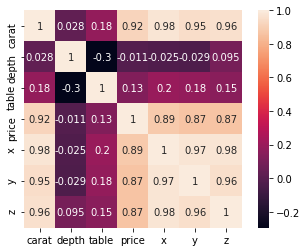

In [19]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [25]:
df = pd.get_dummies(df, columns=['color'])

In [27]:
df['cut'] = df['cut'].astype('category')

In [35]:
from pandas.api.types import CategoricalDtype
cd = CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df['cut']  = df['cut'].astype(cd)
df['cut_codes'] = df['cut'].cat.codes

In [65]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'], axis=1, inplace=True)

In [67]:
from sklearn import preprocessing
df['clarity'] = preprocessing.LabelEncoder().fit_transform(df['clarity'])
df.drop(['cut'], axis=1, inplace=True)

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
clf_lr.score(X_test, y_test)

0.8863506231287224

In [71]:
import statistics
statistics.mean(clf_lr.predict(X_test) - y_test)

-31.492471295883597

In [72]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
clf_rf.score(X_test, y_test)

0.9819281985028484

In [73]:
statistics.mean(clf_rf.predict(X_test) - y_test)

2.51117158567045

In [75]:
model = clf_rf